In [160]:
cd /home/roberto/Documents/Carrera/romain_ic/wavemixing_project/src

/home/roberto/Documents/Carrera/romain_ic/wavemixing_project/src


In [161]:
import numpy as np
import matplotlib.pyplot as plt
from file_manager.visualization_preparation_tools import *

In [130]:
single excitation = True -> returns only g2_single_excitation
                    False -> returns both

SyntaxError: invalid syntax (<ipython-input-130-963c0b8f94d6>, line 1)

In [199]:
b0_input = 0.1
N = 16
Omega = 0.5
Delta = 20.0
DefaultInfo = f"N{N}_Omega{Omega}_Delta{Delta}_"
description = f"b0_{b0_input}_V_Int_On_testing_steady_state_foda_avg"
#descriptionOff = f"b0_{b0_input}_S_Int_Off_fixed__"
results_path = "../results/"
defaultangle = "25_"
angle="205"
rho_ss_parameter = "_direct"
geometric = True


phis = np.float32(np.int32(np.linspace(0,360, 90)))
n_experiments = 5

In [200]:
experiments = np.zeros([n_experiments, len(phis)], dtype = "object")
for i in range(len(experiments)):
    label_folder = results_path+DefaultInfo+description+   rho_ss_parameter + "/"
    paths_array_containing_theta_files = get_array_of_runs_dat_files(label_folder)#all runs for a given phi
    paths_array = [run_name for run_name in paths_array_containing_theta_files if "theta"  in run_name and f"run{i}" in run_name ]
    
    runs_txt = get_array_of_numpy_runs(paths_array, npy=True) #all runs for a given phi
    
    for j in range(len(phis)):
        experiments[i][j] = runs_txt[j]


In [66]:
#experiments[rodada][angulo][t,G2, I]

5

[0, 1, 2, 3, 4]


/home/roberto/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/roberto/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/roberto/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/roberto/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/roberto/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=

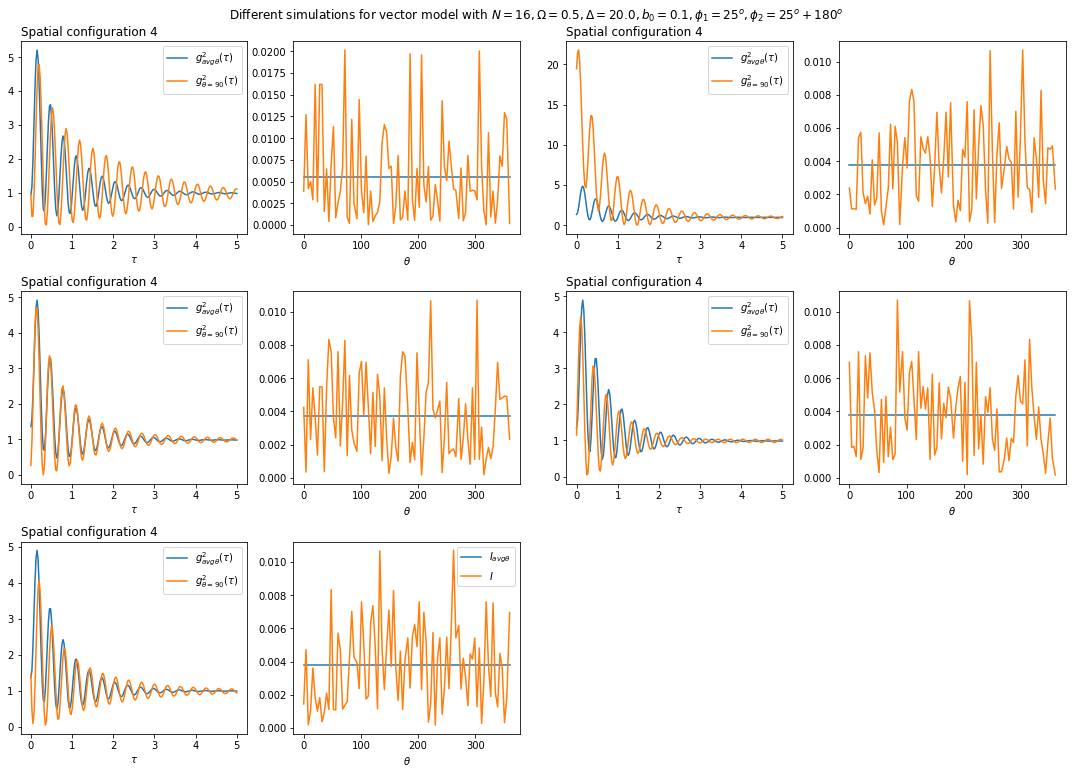

In [201]:
exp_list = [i for i in range(n_experiments)]
print(exp_list)
pares = [[1,2], [3,4], [5,6], [7,8], [9,10], [11,12], [13,14], [15,16]]

fig = plt.figure(figsize = (15,14))
plt.suptitle(f"Different simulations for vector model with $ N = {N}, \Omega = {Omega}, \Delta = {Delta}, b_0 = {b0_input} , \phi_1 = 25^o, \phi_2 = 25^o+180^o $", size = "large")

g2_phi_avg_all_configurations = []
g2_in_plane_all_configurations = []

    

for j in range(len(exp_list)):
    try:
        exp_num = j #exp_list[j]
        #i = exp_num
    except: 
        break
    
    
    G2_phi_avg = np.average([experiments[exp_num][i][0] for i in range(len(phis))], axis = 0)
    I_phi_avg = np.average(np.array([experiments[exp_num][i][2] for i in range(len(phis))]))
    g2_phi_avg  = G2_phi_avg/I_phi_avg
    g2_phi_avg_all_configurations.append(g2_phi_avg)
    
    g2_in_plane_all_configurations.append(np.array(experiments[exp_num][11][0])/experiments[exp_num][11][2])
    
    taulist = experiments[exp_num][0][4]
   
    
    plt.subplot(4, 4, pares[j][0])
    #plt.ylim(0,3)

    plt.title(f"Spatial configuration {i}", loc = "left") 

    plt.plot(taulist, g2_phi_avg, label = r"$g^{2}_{avg \theta}(\tau)$")
    plt.plot(taulist, np.array(experiments[exp_num][11][0])/experiments[exp_num][11][2], label = r"$g^{2}_{\theta = 90}(\tau)$" )
    plt.xlabel(r"$\tau$")
    plt.legend()

    plt.subplot(4, 4, pares[j][1])
    plt.plot(phis,np.ones([len(phis)])*np.average(np.array([experiments[exp_num][i][2] for i in range(len(phis))])), label = r"$ I_{avg \theta}$" ) 
    #plt.plot(phis,[experiments[exp_num][i][0][0] for i in range(len(phis))], label = r"$ G^{(2)}(\tau = 0) $")
    plt.plot(phis,[experiments[exp_num][i][2] for i in range(len(phis))], label = r"$ I $")
    plt.xlabel(r"$\theta$")

plt.tight_layout()
plt.legend()
    


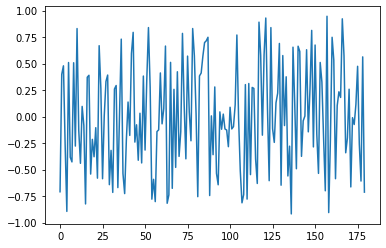

In [190]:
plt.plot(phis[:180],[(experiments[exp_num][i][0][0]-experiments[exp_num][i+180][0][0])/(experiments[exp_num][i][0][0]+experiments[exp_num][i+180][0][0]) for i in range(0,180, 1)], label = r"$ G^{(2)}(\tau = 0) $")

#plt.plot(phis,[experiments[exp_num][i][2] for i in range(len(phis))], label = r"$ I $")